In [1]:
!pip install numpy pandas opendatasets scikit-learn xgboost --quiet

In [2]:
import opendatasets as od
data_url="https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction/overview"
od.download(data_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: glennmathews
Your Kaggle Key: ··········


100%|██████████| 1.56G/1.56G [00:14<00:00, 114MB/s] 



Extracting archive ./new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to ./new-york-city-taxi-fare-prediction


In [3]:
data_dir="./new-york-city-taxi-fare-prediction"

In [4]:
!ls -lh {data_dir}        #a shell command

total 5.4G
-rw-r--r-- 1 root root  486 Oct 13 05:18 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Oct 13 05:18 sample_submission.csv
-rw-r--r-- 1 root root 960K Oct 13 05:18 test.csv
-rw-r--r-- 1 root root 5.4G Oct 13 05:20 train.csv


In [5]:
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [6]:
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

In [7]:
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


In [8]:
import pandas as pd
import random
sample_frac=0.01
selected_cols="fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count".split(",")
selected_cols

['fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [9]:
dtypes={'fare_amount':'float32',
 'pickup_datetime':'float32',
 'pickup_longitude':'float32',
 'pickup_latitude':'float32',
 'dropoff_longitude':'float32',
 'dropoff_latitude':'float32',
 'passenger_count':'uint8'}
random.seed(7)
def skip_row(row_indx):
  if(row_indx==0):
    return False
  return random.random()>sample_frac
df=pd.read_csv(data_dir+"/train.csv",usecols=selected_cols,dtype=dtypes,skiprows=skip_row,parse_dates=['pickup_datetime'])
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,11.300000,2010-03-22 10:01:00+00:00,-74.007668,40.732178,-73.974663,40.758930,1
1,8.000000,2013-02-11 00:13:00+00:00,-74.002846,40.733692,-73.987885,40.728588,1
2,25.299999,2010-05-22 23:29:57+00:00,-74.001343,40.741322,-73.928619,40.864265,1
3,5.300000,2010-04-21 13:39:00+00:00,-73.988319,40.722912,-74.002312,40.729572,1
4,14.500000,2009-01-02 10:13:46+00:00,-73.947044,40.780106,-73.989037,40.751587,2


In [10]:
test_df=pd.read_csv(data_dir+"/test.csv",dtype=dtypes,parse_dates=['pickup_datetime'])
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554467 entries, 0 to 554466
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        554467 non-null  float32            
 1   pickup_datetime    554467 non-null  datetime64[ns, UTC]
 2   pickup_longitude   554467 non-null  float32            
 3   pickup_latitude    554467 non-null  float32            
 4   dropoff_longitude  554462 non-null  float32            
 5   dropoff_latitude   554462 non-null  float32            
 6   passenger_count    554467 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 15.3 MB


In [12]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,554467.000000,554467.000000,554467.000000,554462.000000,554462.000000,554467.000000
mean,11.325595,-72.522156,39.929890,-72.527634,39.926350,1.684901
std,9.775347,13.096281,7.732045,14.269217,7.628259,1.337738
min,-65.000000,-3426.608887,-796.738892,-3408.430420,-1155.996338,0.000000
25%,6.000000,-73.992073,40.735012,-73.991379,40.734039,1.000000
50%,8.500000,-73.981812,40.752647,-73.980148,40.753159,1.000000
75%,12.500000,-73.967094,40.767166,-73.963676,40.768082,2.000000
max,450.000000,2147.514893,2532.172607,2147.514893,2532.172607,208.000000


In [13]:
df.pickup_datetime.min() , df.pickup_datetime.max()

(Timestamp('2009-01-01 00:09:07+0000', tz='UTC'),
 Timestamp('2015-06-30 23:54:17+0000', tz='UTC'))

In [14]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273
std,0.042799,0.033542,0.039093,0.035436,1.278747
min,-74.252190,40.573143,-74.263245,40.568974,1.000000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696682,6.000000


In [15]:
test_df.pickup_datetime.min() , test_df.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

In [16]:
from sklearn.model_selection import train_test_split
train_df,val_df=train_test_split(df,test_size=0.2,random_state=7)
len(train_df) , len(val_df)

(443573, 110894)

In [17]:
train_df.isna().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,5
dropoff_latitude,5
passenger_count,0


In [18]:
train_df=train_df.dropna()
val_df=val_df.dropna()

In [19]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [20]:
input_cols=['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
target_cols='fare_amount'
train_inputs=train_df[input_cols]
train_targets=train_df[target_cols]
val_inputs=val_df[input_cols]
val_targets=val_df[target_cols]

In [21]:
test_inputs=test_df[input_cols]
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982521,40.751259,-73.979652,40.746140,1
3,-73.981163,40.767807,-73.990448,40.751637,1
4,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


In [22]:
import numpy as np
class MeanRegressor:
  def fit(self,inputs,targets):
    self.mean=targets.mean()
  def predict(self,inputs):
    return np.full(inputs.shape[0],self.mean)

In [23]:
baseline_model=MeanRegressor()
baseline_model.fit(train_inputs,train_targets)
baseline_model.mean

11.323149

In [24]:
train_preds=baseline_model.predict(train_inputs)
train_preds

array([11.323149, 11.323149, 11.323149, ..., 11.323149, 11.323149,
       11.323149], dtype=float32)

In [25]:
val_preds=baseline_model.predict(val_inputs)
val_preds

array([11.323149, 11.323149, 11.323149, ..., 11.323149, 11.323149,
       11.323149], dtype=float32)

In [26]:
from sklearn.metrics import root_mean_squared_error
def rmse(targets,preds):
  return root_mean_squared_error(targets,preds)

In [27]:
train_rmse=rmse(train_targets,train_preds)
train_rmse

9.779337

In [28]:
val_rmse=rmse(val_targets,val_preds)
val_rmse

9.757129

In [29]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(train_inputs,train_targets)
train_preds=linear_model.predict(train_inputs)
val_preds=linear_model.predict(val_inputs)
val_preds

array([11.2441225, 11.34368  , 11.244128 , ..., 11.6430645, 11.542492 ,
       11.144697 ], dtype=float32)

In [30]:
rmse(train_targets,train_preds) , rmse(val_targets,val_preds)

(9.777984, 9.755894)

In [31]:
def predict_and_submit(model,fname):
  test_preds=model.predict(test_inputs)
  sub_df=pd.read_csv(data_dir+"/sample_submission.csv")
  sub_df['fare_amount']=test_preds
  sub_df.to_csv(fname,index=None)

In [32]:
predict_and_submit(linear_model,'linearReg_submission.csv')

In [33]:
def add_dateparts(df,col):
  df[col+'_year']=df[col].dt.year
  df[col+'_month']=df[col].dt.month
  df[col+'_day']=df[col].dt.day
  df[col+'_weekday']=df[col].dt.weekday
  df[col+'_hour']=df[col].dt.hour

In [34]:
add_dateparts(train_df,'pickup_datetime')
add_dateparts(test_df,'pickup_datetime')
add_dateparts(val_df,'pickup_datetime')

In [35]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
399173,3.5,2014-07-21 06:04:00+00:00,-73.979118,40.747166,-73.974617,40.744381,1,2014,7,21,0,6
382815,9.0,2015-06-21 02:58:15+00:00,-73.991409,40.749805,-74.004227,40.721863,1,2015,6,21,6,2
111874,9.0,2014-12-13 19:13:00+00:00,-73.984375,40.740192,-73.983505,40.727596,2,2014,12,13,5,19
284870,7.7,2009-04-28 14:02:00+00:00,-73.967674,40.770981,-73.971359,40.764973,1,2009,4,28,1,14
19826,4.1,2010-04-07 09:42:00+00:00,-73.984161,40.743221,-73.978767,40.740776,1,2010,4,7,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...
315737,5.3,2011-02-12 13:37:30+00:00,-73.971939,40.745804,-73.959503,40.763145,1,2011,2,12,5,13
79463,4.9,2009-01-22 15:00:29+00:00,-73.972176,40.746513,-73.968994,40.757420,1,2009,1,22,3,15
328599,8.0,2014-05-24 22:33:32+00:00,-73.955521,40.779411,-73.971916,40.756546,1,2014,5,24,5,22
535030,10.0,2015-01-22 20:37:40+00:00,-73.968491,40.757343,-73.983383,40.770252,1,2015,1,22,3,20


In [36]:
def haversine_np(lon1, lat1, lon2, lat2):                    #borrowed code
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [37]:
def add_trip_distance(df):
  df['trip_distance']=haversine_np(df['pickup_longitude'], df['pickup_latitude'],
                                   df['dropoff_longitude'], df['dropoff_latitude'])

In [38]:
add_trip_distance(train_df)
add_trip_distance(val_df)
add_trip_distance(test_df)

In [39]:
#to remove outliers, we will consider the following ranges of values only - for training
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) &
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) &
              (df['pickup_longitude'] <= -72) &
              (df['dropoff_longitude'] >= -75) &
              (df['dropoff_longitude'] <= -72) &
              (df['pickup_latitude'] >= 40) &
              (df['pickup_latitude'] <= 42) &
              (df['dropoff_latitude'] >=40) &
              (df['dropoff_latitude'] <= 42) &
              (df['passenger_count'] >= 1) &
              (df['passenger_count'] <= 6)]

In [57]:
train_df=remove_outliers(train_df)
val_df=remove_outliers(val_df)
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
count,432632.000000,432632.000000,432632.000000,432632.000000,432632.000000,432632.000000,432632.000000,432632.000000,432632.000000,432632.000000,432632.000000,432632.000000
mean,11.313111,-73.975182,40.751095,-73.974350,40.751469,1.690511,2011.733355,6.270523,15.713909,3.036712,13.485588,3.327996
std,9.672769,0.045432,0.090957,0.045167,0.092640,1.306684,1.865356,3.431658,8.692609,1.948960,6.524178,3.796359
min,2.500000,-74.932411,40.022034,-74.944290,40.039036,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992287,40.736641,-73.991585,40.735554,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.253575
50%,8.500000,-73.982101,40.753353,-73.980606,40.753868,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,2.152234
75%,12.500000,-73.968330,40.767578,-73.965378,40.768391,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,3.912734
max,400.000000,-72.061897,41.381992,-72.634644,41.718590,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,174.792603


In [58]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance'],
      dtype='object')

In [59]:
input_cols=['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance']
target_cols='fare_amount'
train_inputs=train_df[input_cols]
train_targets=train_df[target_cols]
val_inputs=val_df[input_cols]
val_targets=val_df[target_cols]

In [60]:
def evaluate(model):
  train_pred=model.predict(train_inputs)
  val_pred=model.predict(val_inputs)
  train_rmse=root_mean_squared_error(train_targets,train_pred)
  val_rmse=root_mean_squared_error(val_targets,val_pred)
  return train_rmse , val_rmse

In [61]:
from sklearn.linear_model import Ridge
model1=Ridge(random_state=7).fit(train_inputs,train_targets)
evaluate(model1)

(5.441237591668195, 5.471552869914214)

In [62]:
def predict_and_submit(model,fname):
  test_preds=model.predict(test_inputs)
  sub_df=pd.read_csv(data_dir+"/sample_submission.csv")
  sub_df['fare_amount']=test_preds
  sub_df.to_csv(fname,index=None)
test_inputs=test_df[input_cols]

In [56]:
predict_and_submit(model1,"ridge_model_submission.csv")

In [63]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor(random_state=7,n_jobs=-1,n_estimators=100,max_depth=10).fit(train_inputs,train_targets)

In [64]:
evaluate(model2)

(3.5842492446219723, 4.116781140294561)

In [65]:
predict_and_submit(model2,'rf_model_submission.csv')

In [70]:
from xgboost import XGBRegressor
model3=XGBRegressor(random_state=7,n_jobs=-1,objective='reg:squarederror',max_depth=5,n_estimators=200).fit(train_inputs,train_targets)

In [71]:
evaluate(model3)

(3.2257457, 3.935554)

In [72]:
predict_and_submit(model3,'xgb_reg_submission.csv')

In [75]:
#tuning hyperparameters for the best model (model3) so far
import matplotlib.pyplot as plt
def test_params(Model,**params):
  model=Model(**params).fit(train_inputs,train_targets)
  train_rmse=root_mean_squared_error(model.predict(train_inputs),train_targets)
  val_rmse=root_mean_squared_error(model.predict(val_inputs),val_targets)
  return train_rmse,val_rmse

def test_params_and_plot(Model,param_name,param_values,**other_params):
  train_errors,val_errors=[],[]
  for value in param_values :
    params=dict(other_params)
    params[param_name]=value
    train_rmse,val_rmse=test_params(Model,**params)
    train_errors.append(train_rmse)
    val_errors.append(val_rmse)
  plt.figure(figsize=(10,6))
  plt.title('Overfitting curve: '+param_name)
  plt.plot(param_values,train_errors,'b-o')
  plt.plot(param_values,val_errors,'r-o')
  plt.xlabel(param_name)
  plt.ylabel('RMSE')
  plt.legend(['Training','Validation'])


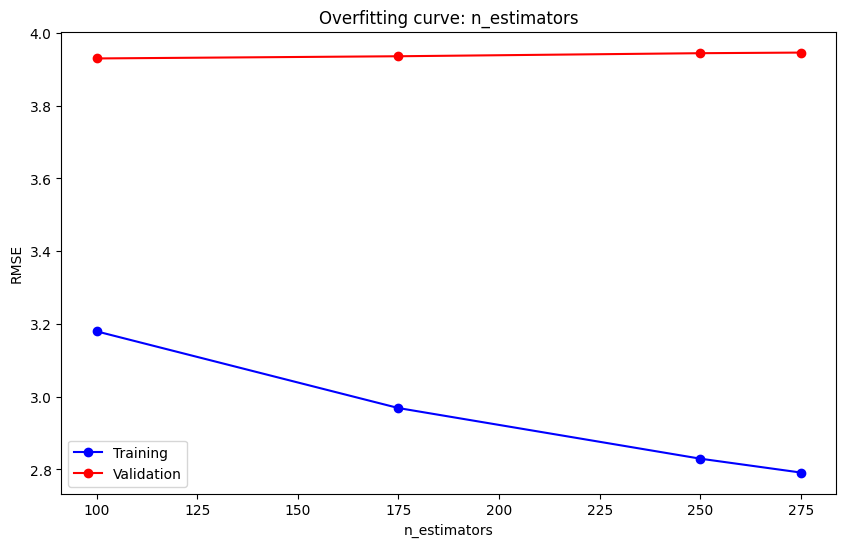

In [76]:
best_params={'random_state':7,'n_jobs':-1,'objective':'reg:squarederror'}
test_params_and_plot(XGBRegressor,'n_estimators',[100,175,250,275],**best_params)

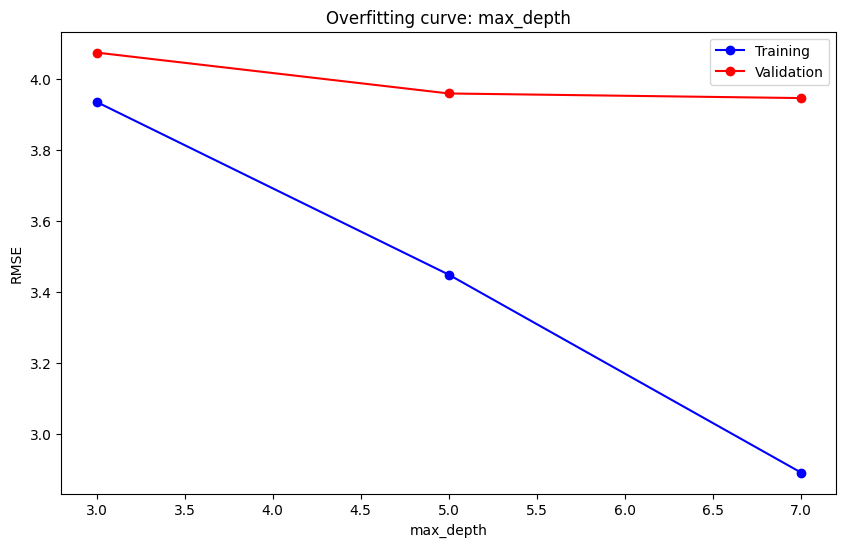

In [77]:
best_params={'random_state':7,'n_jobs':-1,'objective':'reg:squarederror'}
test_params_and_plot(XGBRegressor,'max_depth',[3,5,7],**best_params)

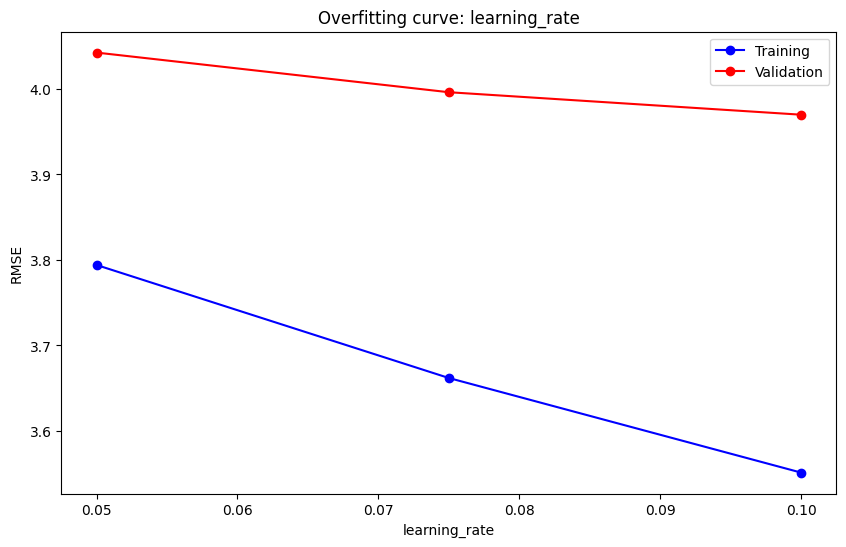

In [78]:
best_params={'random_state':7,'n_jobs':-1,'objective':'reg:squarederror'}
test_params_and_plot(XGBRegressor,'learning_rate',[0.05,0.075,0.1],**best_params)

In [80]:
final_model=XGBRegressor(random_state=7,n_jobs=-1,max_depth=5,objective='reg:squarederror',
                         n_estimators=200,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8)
final_model.fit(train_inputs,train_targets)
evaluate(final_model)

(3.586642, 3.9590993)

In [81]:
predict_and_submit(final_model,'tuned_xgb_model_submission.csv')